In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score


In [2]:
#data reading
train_df = pd.read_csv("mental-health-dataset/train.csv")
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [4]:
#cleaning data
#first check if data is null
train_df.isnull().sum()


id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [5]:
train_df.duplicated().sum()

0

In [6]:
train_df.Profession.value_counts()

Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64

In [7]:
train_df[train_df["Profession"] == "Student"]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
11509,11509,Prisha,Female,22.0,Thane,Working Professional,Student,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,B.Com,Yes,5.0,2.0,No,0
20049,20049,Himani,Female,24.0,Kolkata,Student,Student,1.0,NaN,7.32,4.0,NaN,More than 8 hours,Moderate,MA,Yes,8.0,3.0,Yes,0
20296,20296,Ayaan,Male,32.0,Agra,Student,Student,2.0,NaN,8.13,5.0,NaN,More than 8 hours,Unhealthy,B.Ed,No,11.0,1.0,No,0
25447,25447,Gaurav,Male,60.0,Pune,Working Professional,Student,NaN,3.0,NaN,NaN,2.0,5-6 hours,Unhealthy,M.Pharm,No,8.0,1.0,Yes,0
73447,73447,Harsha,Male,35.0,Ahmedabad,Working Professional,Student,NaN,4.0,NaN,NaN,2.0,Less than 5 hours,Moderate,BSc,No,1.0,3.0,Yes,0
88617,88617,Ayush,Male,29.0,Srinagar,Working Professional,Student,NaN,4.0,NaN,NaN,2.0,5-6 hours,Moderate,BE,No,10.0,1.0,Yes,0
126162,126162,Kashish,Female,30.0,Nagpur,Student,Student,5.0,NaN,7.24,1.0,NaN,Less than 5 hours,Unhealthy,MD,Yes,3.0,3.0,Yes,0


In [8]:
train_df.groupby(['Academic Pressure'])['Working Professional or Student'].value_counts()

Academic Pressure  Working Professional or Student
1.0                Student                            4801
2.0                Student                            4178
                   Working Professional                  1
3.0                Student                            7462
                   Working Professional                  1
4.0                Student                            5155
                   Working Professional                  3
5.0                Student                            6296
Name: count, dtype: int64

In [9]:
train_df.loc[train_df['Working Professional or Student'] == 'Working Professional', 'Academic Pressure'] = 0
train_df.loc[train_df['Working Professional or Student'] == 'Student', 'Work Pressure'] = 0
train_df.loc[train_df['Working Professional or Student'] == 'Student', 'Profession'] = 'Student'

In [11]:
train_df[train_df['Profession'].isnull()].head(20)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
29,29,Kashish,Female,19.0,Agra,Working Professional,NaN,0.0,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
36,36,Anvi,Female,50.0,Kalyan,Working Professional,NaN,0.0,4.0,NaN,NaN,4.0,7-8 hours,Unhealthy,Class 12,No,0.0,2.0,No,0
43,43,Vidya,Female,18.0,Vadodara,Working Professional,NaN,0.0,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,Yes,10.0,5.0,No,1
48,48,Anand,Male,38.0,Ghaziabad,Working Professional,NaN,0.0,2.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,1.0,1.0,Yes,0
50,50,Raunak,Male,21.0,Pune,Working Professional,NaN,0.0,4.0,NaN,NaN,5.0,5-6 hours,Healthy,Class 12,Yes,8.0,5.0,Yes,0
70,70,Abhishek,Male,18.0,Vasai-Virar,Working Professional,NaN,0.0,5.0,NaN,NaN,2.0,Less than 5 hours,Moderate,Class 12,Yes,6.0,4.0,No,1
80,80,Samar,Male,21.0,Thane,Working Professional,NaN,0.0,4.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,1.0,2.0,No,0
81,81,Reyansh,Male,19.0,Nagpur,Working Professional,NaN,0.0,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,Yes,11.0,2.0,No,1
82,82,Saanvi,Female,49.0,Hyderabad,Working Professional,NaN,0.0,1.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,0.0,3.0,No,0
93,93,Shiv,Male,18.0,Thane,Working Professional,NaN,0.0,4.0,NaN,NaN,2.0,7-8 hours,Unhealthy,Class 12,No,2.0,1.0,No,0


In [12]:
professions = ['Content Writer', 'Architect', 'Consultant', 'HR Manager']
null_rows = train_df[train_df['Profession'].isnull()]
num_nulls = len(null_rows)
random_professions = np.random.choice(professions, size=num_nulls)
train_df.loc[train_df['Profession'].isnull(), 'Profession'] = random_professions

In [13]:
train_df.groupby(['Academic Pressure'])['Working Professional or Student'].value_counts()

Academic Pressure  Working Professional or Student
0.0                Working Professional               112799
1.0                Student                              4801
2.0                Student                              4178
3.0                Student                              7462
4.0                Student                              5155
5.0                Student                              6296
Name: count, dtype: int64

In [14]:
train_df['CGPA'].describe()

count    27898.000000
mean         7.658636
std          1.464466
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

In [15]:

train_df = train_df.drop(columns=['CGPA','Study Satisfaction'])


In [16]:
train_df.groupby(['Academic Pressure'])['Working Professional or Student'].value_counts()

Academic Pressure  Working Professional or Student
0.0                Working Professional               112799
1.0                Student                              4801
2.0                Student                              4178
3.0                Student                              7462
4.0                Student                              5155
5.0                Student                              6296
Name: count, dtype: int64

In [17]:
train_df['Job Satisfaction'].describe()

count    112790.000000
mean          2.974404
std           1.416078
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Job Satisfaction, dtype: float64

In [18]:
train_df[(train_df['Job Satisfaction'].isnull()) & (train_df['Profession'] == 'Student')]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,0.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,2.0,0.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,26,Aditya,Male,31.0,Srinagar,Student,Student,3.0,0.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,30,Prisha,Female,28.0,Varanasi,Student,Student,3.0,0.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,32,Chhavi,Female,25.0,Jaipur,Student,Student,4.0,0.0,NaN,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,Aaradhya,Female,27.0,Surat,Student,Student,5.0,0.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,140686,Rohan,Male,27.0,Ludhiana,Student,Student,2.0,0.0,NaN,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,140689,Ayaan,Male,31.0,Faridabad,Student,Student,3.0,0.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
140690,140690,Rashi,Female,18.0,Ludhiana,Student,Student,5.0,0.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [19]:
train_df.groupby(['Academic Pressure'])['Working Professional or Student'].value_counts()

Academic Pressure  Working Professional or Student
0.0                Working Professional               112799
1.0                Student                              4801
2.0                Student                              4178
3.0                Student                              7462
4.0                Student                              5155
5.0                Student                              6296
Name: count, dtype: int64

In [20]:
train_df.loc[(train_df['Profession'] == 'Student') & (train_df['Job Satisfaction'].isnull()), 'Job Satisfaction'] = 0

In [21]:
train_df.groupby(['Academic Pressure'])['Working Professional or Student'].value_counts()

Academic Pressure  Working Professional or Student
0.0                Working Professional               112799
1.0                Student                              4801
2.0                Student                              4178
3.0                Student                              7462
4.0                Student                              5155
5.0                Student                              6296
Name: count, dtype: int64

In [22]:
train_df[train_df['Job Satisfaction'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
18752,18752,Aarti,Female,18.0,Kalyan,Working Professional,HR Manager,0.0,NaN,NaN,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,Yes,1
25647,25647,Ishwar,Male,57.0,Kalyan,Working Professional,Content Writer,0.0,1.0,NaN,Less than 5 hours,Unhealthy,Class 12,No,4.0,1.0,No,0
34694,34694,Kriti,Female,46.0,Meerut,Working Professional,Content Writer,0.0,NaN,NaN,5-6 hours,Moderate,Class 12,Yes,12.0,3.0,No,0
35612,35612,Siddhesh,Male,27.0,Vadodara,Working Professional,Content Writer,0.0,NaN,NaN,Less than 5 hours,Unhealthy,B.Pharm,No,11.0,3.0,No,1
41915,41915,Advait,Male,18.0,Kolkata,Working Professional,Architect,0.0,NaN,NaN,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,Yes,1
52199,52199,Manan,Male,50.0,Agra,Working Professional,HR Manager,0.0,4.0,NaN,5-6 hours,Unhealthy,Class 12,No,1.0,3.0,Yes,0
55222,55222,Trisha,Female,21.0,Varanasi,Working Professional,Architect,0.0,5.0,NaN,7-8 hours,Moderate,B.Arch,No,11.0,2.0,Yes,0
55827,55827,Prachi,Female,19.0,Kalyan,Working Professional,Architect,0.0,NaN,NaN,5-6 hours,Unhealthy,Class 12,Yes,4.0,4.0,No,1
57196,57196,Manvi,Female,20.0,Visakhapatnam,Working Professional,HR Manager,0.0,NaN,NaN,Less than 5 hours,Moderate,Class 12,No,0.0,4.0,Yes,1
60348,60348,Nishant,Male,29.0,Agra,Working Professional,HR Manager,0.0,NaN,NaN,5-6 hours,Moderate,B.Ed,No,7.0,2.0,Yes,0


In [23]:
train_df.groupby(['Academic Pressure'])['Working Professional or Student'].value_counts()

Academic Pressure  Working Professional or Student
0.0                Working Professional               112799
1.0                Student                              4801
2.0                Student                              4178
3.0                Student                              7462
4.0                Student                              5155
5.0                Student                              6296
Name: count, dtype: int64

In [24]:
train_df = train_df[train_df['id'] != 99062]

In [25]:
train_df[train_df['Academic Pressure'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
17549,17549,Tanya,Female,20.0,Patna,Student,Student,NaN,0.0,0.0,5-6 hours,Moderate,Class 12,No,0.0,3.0,Yes,0
21880,21880,Aarush,Male,38.0,Chennai,Student,Student,NaN,0.0,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
70453,70453,Veda,Female,20.0,Ahmedabad,Student,Student,NaN,0.0,2.0,Less than 5 hours,Moderate,Class 12,Yes,12.0,3.0,Yes,1
75007,75007,Aarav,Male,21.0,Lucknow,Student,Student,NaN,0.0,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
105773,105773,Anand,Male,18.0,Ahmedabad,Student,Student,NaN,0.0,1.0,Less than 5 hours,Moderate,Class 12,Yes,9.0,5.0,No,1
122983,122983,Saanvi,Female,30.0,Ghaziabad,Student,Student,NaN,0.0,0.0,Less than 5 hours,Unhealthy,B.Com,Yes,5.0,1.0,No,0
129756,129756,Kian,Male,18.0,Rajkot,Student,Student,NaN,0.0,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1
134830,134830,Aaradhya,Female,24.0,Meerut,Student,Student,NaN,0.0,2.0,More than 8 hours,Unhealthy,Class 12,No,0.0,5.0,No,0
137013,137013,Vikram,Male,36.0,Varanasi,Student,Student,NaN,0.0,0.0,More than 8 hours,Moderate,Class 12,Yes,8.0,5.0,Yes,1


In [26]:
train_df.groupby(['Academic Pressure'])['Working Professional or Student'].value_counts()

Academic Pressure  Working Professional or Student
0.0                Working Professional               112798
1.0                Student                              4801
2.0                Student                              4178
3.0                Student                              7462
4.0                Student                              5155
5.0                Student                              6296
Name: count, dtype: int64

In [27]:
train_df.loc[train_df['Academic Pressure'].isnull(), 'Academic Pressure'] = 3.0

In [28]:
train_df.groupby(['Work Pressure'])['Working Professional or Student'].value_counts()

Work Pressure  Working Professional or Student
0.0            Student                            27901
1.0            Working Professional               21562
2.0            Working Professional               24372
3.0            Working Professional               21899
4.0            Working Professional               22512
5.0            Working Professional               22434
Name: count, dtype: int64

In [29]:
train_df['Academic Pressure'].describe()

count    140699.000000
mean          0.623103
std           1.395516
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: Academic Pressure, dtype: float64

In [30]:
train_df[train_df['Work Pressure'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
15846,15846,Shrey,Male,53.0,Vasai-Virar,Working Professional,HR Manager,0.0,NaN,5.0,More than 8 hours,Unhealthy,Class 12,No,12.0,1.0,No,0
18752,18752,Aarti,Female,18.0,Kalyan,Working Professional,HR Manager,0.0,NaN,NaN,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,Yes,1
34694,34694,Kriti,Female,46.0,Meerut,Working Professional,Content Writer,0.0,NaN,NaN,5-6 hours,Moderate,Class 12,Yes,12.0,3.0,No,0
35612,35612,Siddhesh,Male,27.0,Vadodara,Working Professional,Content Writer,0.0,NaN,NaN,Less than 5 hours,Unhealthy,B.Pharm,No,11.0,3.0,No,1
41915,41915,Advait,Male,18.0,Kolkata,Working Professional,Architect,0.0,NaN,NaN,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,Yes,1
55827,55827,Prachi,Female,19.0,Kalyan,Working Professional,Architect,0.0,NaN,NaN,5-6 hours,Unhealthy,Class 12,Yes,4.0,4.0,No,1
57196,57196,Manvi,Female,20.0,Visakhapatnam,Working Professional,HR Manager,0.0,NaN,NaN,Less than 5 hours,Moderate,Class 12,No,0.0,4.0,Yes,1
60348,60348,Nishant,Male,29.0,Agra,Working Professional,HR Manager,0.0,NaN,NaN,5-6 hours,Moderate,B.Ed,No,7.0,2.0,Yes,0
76104,76104,Vanya,Female,20.0,Nashik,Working Professional,Content Writer,0.0,NaN,1.0,7-8 hours,Moderate,Class 12,No,11.0,1.0,No,1
85126,85126,Monika,Female,27.0,Kanpur,Working Professional,Mechanical Engineer,0.0,NaN,5.0,5-6 hours,Healthy,BE,Yes,10.0,5.0,No,1


In [31]:
train_df.groupby(['Work Pressure'])['Working Professional or Student'].value_counts()

Work Pressure  Working Professional or Student
0.0            Student                            27901
1.0            Working Professional               21562
2.0            Working Professional               24372
3.0            Working Professional               21899
4.0            Working Professional               22512
5.0            Working Professional               22434
Name: count, dtype: int64

In [32]:
train_df.loc[train_df['Work Pressure'].isnull(), 'Work Pressure'] = 3.0

In [33]:
train_df.loc[train_df['Job Satisfaction'].isnull(), 'Job Satisfaction'] = 3.0

In [34]:
train_df['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49704
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [35]:
def map_dietary_habits(value):
    """
    Maps various dietary habit indicators to a standardized category.

    This function takes a single value representing dietary habits and categorizes it into one of three groups:
    'Healthy', 'Unhealthy', or 'Moderate'. The mapping is based on predefined criteria.

    Parameters:
    value (str): A string representing the dietary habit indicator. This can be any of the following:
        - Healthy indicators: ['Healthy', 'More Healthy', 'Yes', 'Class 12', 'Indoor', 'Male', 'BSc', 'Pratham']
        - Unhealthy indicators: ['Unhealthy', 'No Healthy', 'Less Healthy', 'Hormonal', 'Vegas', 'Electrician']
        - Moderate indicators: ['Moderate', '3']

    Returns:
    str: A standardized dietary habit category. This will be one of the following:
        - 'Healthy' if the input value matches any healthy indicators.
        - 'Unhealthy' if the input value matches any unhealthy indicators.
        - 'Moderate' if the input value matches moderate indicators or does not match any predefined categories.
    """
    
    if value in ['Healthy', 'More Healthy', 'Yes', 'Class 12', 'Indoor', 'Male', 'BSc', 'Pratham']:
        return 'Healthy'
    elif value in ['Unhealthy', 'No Healthy', 'Less Healthy', 'Hormonal', 'Vegas', 'Electrician']:
        return 'Unhealthy'
    elif value in ['Moderate', '3']:
        return 'Moderate'
    else:
        return 'Moderate'  

# Applying the function to the DataFrame
train_df['Dietary Habits'] = train_df['Dietary Habits'].apply(map_dietary_habits)


In [36]:
train_df['Degree'].value_counts()

Degree
Class 12    14729
B.Ed        11690
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 115, dtype: int64

In [37]:
train_df.loc[train_df['Degree'].isnull(), 'Degree'] = 'Class 12'

In [38]:
train_df['Financial Stress'].describe()

count    140695.000000
mean          2.988969
std           1.413628
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Financial Stress, dtype: float64

In [39]:
train_df.loc[train_df['Financial Stress'].isnull(), 'Financial Stress'] = 3.0

In [40]:
train_df.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [41]:
test_df = pd.read_csv("mental-health-dataset/test.csv")
test_df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [42]:
test_df.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [43]:
test_df = test_df.drop(columns=['CGPA','Study Satisfaction'])
test_df.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [44]:
test_df.loc[test_df['Working Professional or Student'] == 'Working Professional', 'Academic Pressure'] = 0
test_df.loc[test_df['Working Professional or Student'] == 'Student', 'Work Pressure'] = 0
test_df.loc[test_df['Working Professional or Student'] == 'Student', 'Profession'] = 'Student'

In [45]:
professions = ['Content Writer', 'Architect', 'Consultant', 'HR Manager']
null_rows = test_df[test_df['Profession'].isnull()]
num_nulls = len(null_rows)
random_professions = np.random.choice(professions, size=num_nulls)
test_df.loc[test_df['Profession'].isnull(), 'Profession'] = random_professions

In [46]:
test_df.loc[(test_df['Profession'] == 'Student') & (test_df['Job Satisfaction'].isnull()), 'Job Satisfaction'] = 0

In [47]:
test_df.loc[test_df['Academic Pressure'].isnull(), 'Academic Pressure'] = 3.0
test_df.loc[test_df['Work Pressure'].isnull(), 'Work Pressure'] = 3.0
test_df.loc[test_df['Job Satisfaction'].isnull(), 'Job Satisfaction'] = 3.0
test_df.loc[test_df['Degree'].isnull(), 'Degree'] = 'Class 12'
test_df['Dietary Habits'] = test_df['Dietary Habits'].apply(map_dietary_habits)

In [48]:
test_df.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64

In [49]:
#Univariant analysis
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140699 entries, 0 to 140699
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140699 non-null  int64  
 1   Name                                   140699 non-null  object 
 2   Gender                                 140699 non-null  object 
 3   Age                                    140699 non-null  float64
 4   City                                   140699 non-null  object 
 5   Working Professional or Student        140699 non-null  object 
 6   Profession                             140699 non-null  object 
 7   Academic Pressure                      140699 non-null  float64
 8   Work Pressure                          140699 non-null  float64
 9   Job Satisfaction                       140699 non-null  float64
 10  Sleep Duration                         140699 non-null  objec

In [50]:
train_df.Gender.value_counts()


Gender
Male      77464
Female    63235
Name: count, dtype: int64

/tmp/ipykernel_29582/2244241076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_df['Gender'].value_counts().index,


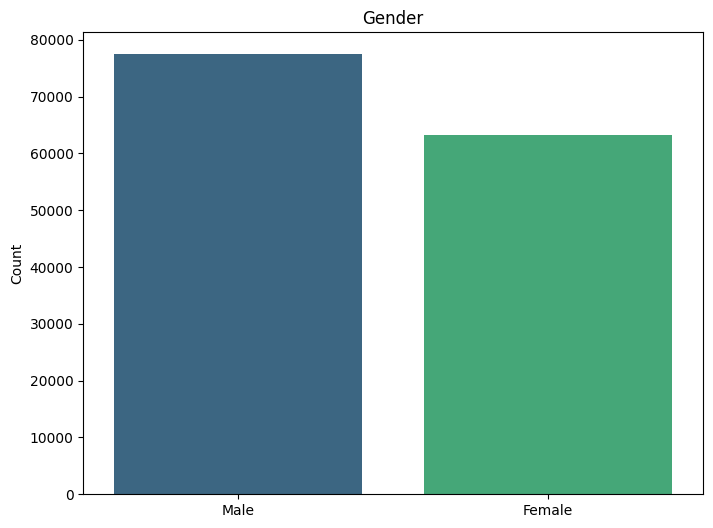

In [51]:
plt.figure(figsize=(8, 6))
sns.barplot(x=train_df['Gender'].value_counts().index, 
            y=train_df['Gender'].value_counts().values, 
            palette='viridis') 
plt.title("Gender")
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [52]:
train_df['Age'].describe()

count    140699.000000
mean         40.388738
std          12.384066
min          18.000000
25%          29.000000
50%          42.000000
75%          51.000000
max          60.000000
Name: Age, dtype: float64

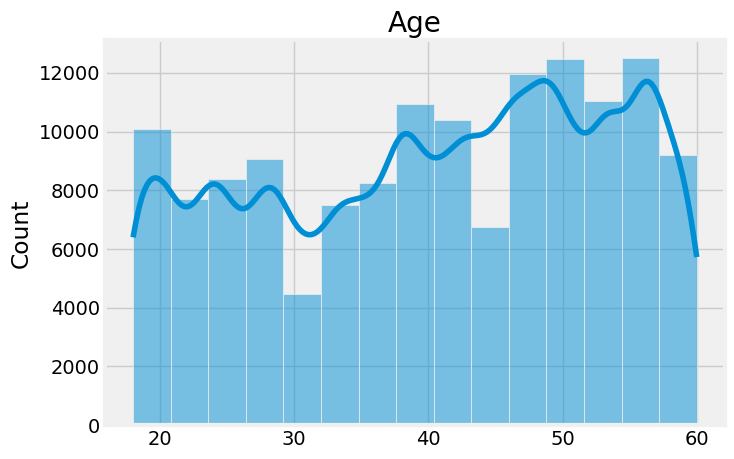

In [53]:
plt.figure(figsize=(8, 5))
plt.style.use('fivethirtyeight')
sns.histplot(train_df['Age'], bins=15, kde=True)
plt.title('Age')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [54]:
train_df['City'].value_counts().head(10)

City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Name: count, dtype: int64

/tmp/ipykernel_29582/3459536975.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=train_df['City'].value_counts().head(10).index,


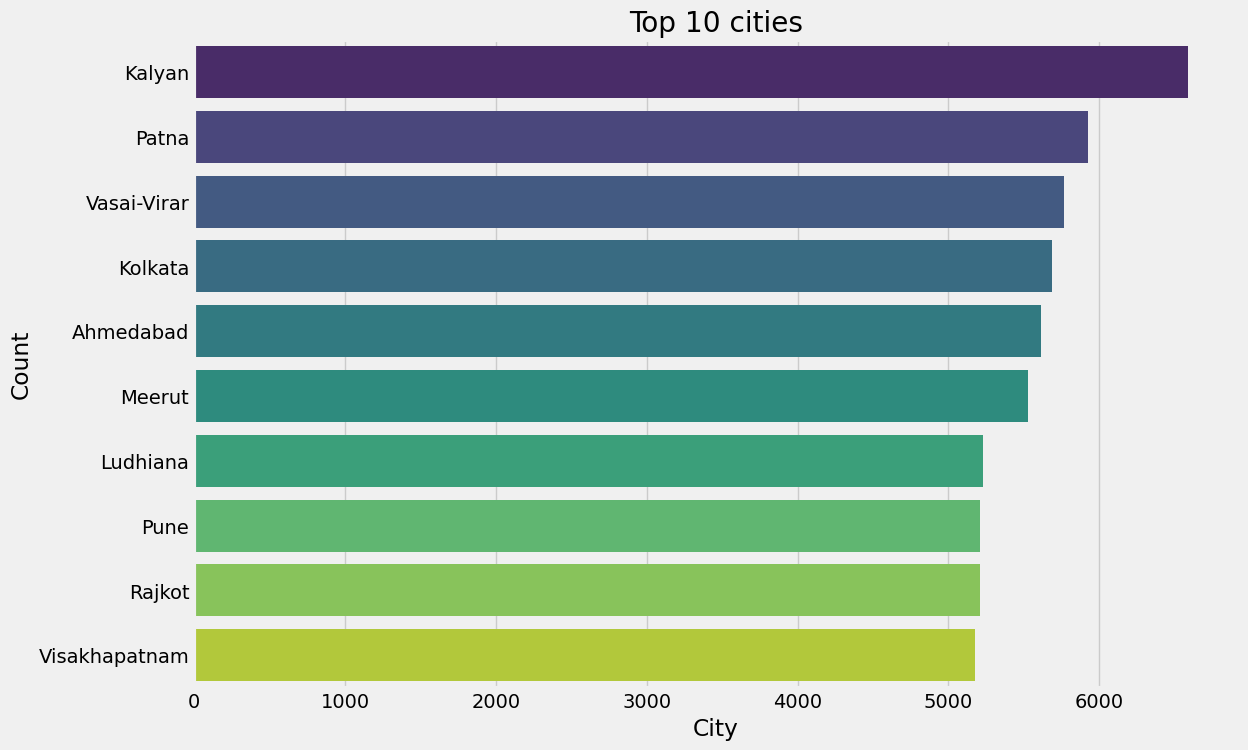

In [55]:
plt.figure(figsize=(12, 8))
sns.barplot(y=train_df['City'].value_counts().head(10).index, 
            x=train_df['City'].value_counts().head(10).values, 
            palette='viridis') 
plt.title("Top 10 cities")
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [56]:
counts = train_df['Working Professional or Student'].value_counts()
percentage = train_df['Working Professional or Student'].value_counts(normalize=True)*100
freqTable = pd.DataFrame({'Frequency':counts,'Percent':percentage})
freqTable

,Frequency,Percent
Working Professional or Student,,
Working Professional,112798,80.169724
Student,27901,19.830276


/tmp/ipykernel_29582/128011346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=train_df['Profession'].value_counts().head().index,


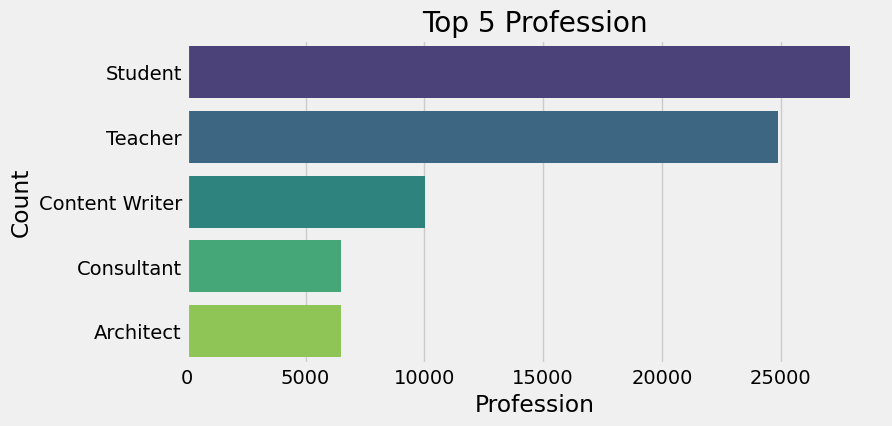

In [57]:
plt.figure(figsize=(8, 4))
sns.barplot(y=train_df['Profession'].value_counts().head().index, 
            x=train_df['Profession'].value_counts().head().values, 
            palette='viridis') 
plt.title("Top 5 Profession")
plt.xlabel('Profession')
plt.ylabel('Count')
plt.show()

In [58]:
train_df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38783
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [59]:
train_df['Sleep Duration']

0         More than 8 hours
1         Less than 5 hours
2                 5-6 hours
3         Less than 5 hours
4                 5-6 hours
                ...        
140695            5-6 hours
140696            7-8 hours
140697    More than 8 hours
140698            5-6 hours
140699    Less than 5 hours
Name: Sleep Duration, Length: 140699, dtype: object

In [60]:
#preprocessing
def extract_sleep_hours(value):
    import re
    match = re.findall(r'\d+', value)
    if len(match) == 1:  
        return float(match[0])
    elif len(match) == 2:  
        return (float(match[0]) + float(match[1])) / 2
    else:
        return None  


train_df['Numeric Sleep Duration'] = train_df['Sleep Duration'].apply(extract_sleep_hours)
test_df['Numeric Sleep Duration'] = test_df['Sleep Duration'].apply(extract_sleep_hours)



In [61]:
train_df['Numeric Sleep Duration'].value_counts()

Numeric Sleep Duration
5.0     38789
7.5     36970
8.0     32728
5.5     32142
3.5        16
6.5         8
4.5         8
7.0         6
2.5         5
45.0        2
10.0        2
8.5         2
10.5        2
42.5        1
60.5        1
2.0         1
1.5         1
35.5        1
49.0        1
46.5        1
Name: count, dtype: int64

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140699 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140699 non-null  int64  
 1   Name                                   140699 non-null  object 
 2   Gender                                 140699 non-null  object 
 3   Age                                    140699 non-null  float64
 4   City                                   140699 non-null  object 
 5   Working Professional or Student        140699 non-null  object 
 6   Profession                             140699 non-null  object 
 7   Academic Pressure                      140699 non-null  float64
 8   Work Pressure                          140699 non-null  float64
 9   Job Satisfaction                       140699 non-null  float64
 10  Sleep Duration                         140699 non-null  objec

In [63]:
train_df['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49717
Unhealthy    46232
Healthy      44750
Name: count, dtype: int64

/tmp/ipykernel_29582/3321668616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_df['Dietary Habits'].value_counts().index,


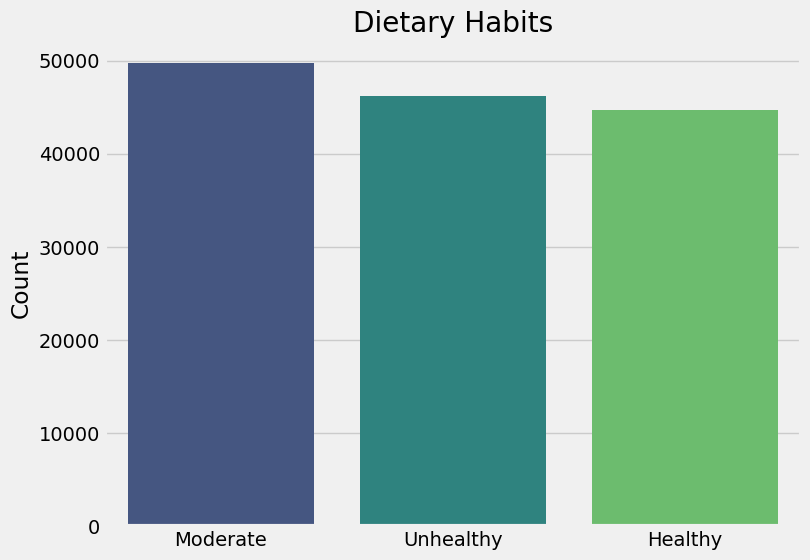

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(x=train_df['Dietary Habits'].value_counts().index, 
            y=train_df['Dietary Habits'].value_counts().values, 
            palette='viridis') 
plt.title("Dietary Habits")
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [65]:
#encoding
categorical_cols = train_df.drop(columns=['id','Name','Age','Academic Pressure','Work Pressure','Job Satisfaction','Sleep Duration','Work/Study Hours','Financial Stress','Depression','Numeric Sleep Duration'])

categorical_cols.head()

,Gender,City,Working Professional or Student,Profession,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Female,Ludhiana,Working Professional,Chef,Healthy,BHM,No,No
1,Male,Varanasi,Working Professional,Teacher,Unhealthy,LLB,Yes,No
2,Male,Visakhapatnam,Student,Student,Healthy,B.Pharm,Yes,No
3,Male,Mumbai,Working Professional,Teacher,Moderate,BBA,Yes,Yes
4,Female,Kanpur,Working Professional,Business Analyst,Unhealthy,BBA,Yes,Yes


In [66]:
label_encoder = LabelEncoder()

for col in categorical_cols:

    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.fit_transform(test_df[col])

In [67]:
#data splitting
X = train_df.drop(columns=['id','Name','Sleep Duration','Depression']) 
y = train_df['Depression']
x_train, x_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)
print(f"x_train: {x_train.shape}, y_train: {len(y_train)}")
print(f"x_valid: {x_valid.shape}, y_valid: {len(y_valid)}")

x_train: (112559, 15), y_train: 112559
x_valid: (28140, 15), y_valid: 28140


In [68]:
model = CatBoostClassifier(iterations= 545,learning_rate= 0.09928248945425253,colsample_bylevel= 0.8829334721878778,subsample= 0.5547932441628254,min_data_in_leaf= 2,depth= 5,l2_leaf_reg= 18.745159259296127,random_strength= 0.6562407394010031)
model.fit(x_train,y_train)

0:	learn: 0.5416229	total: 68.8ms	remaining: 37.4s
1:	learn: 0.4348711	total: 85.9ms	remaining: 23.3s
2:	learn: 0.3677204	total: 104ms	remaining: 18.8s
3:	learn: 0.3203307	total: 122ms	remaining: 16.5s
4:	learn: 0.2887219	total: 146ms	remaining: 15.8s
5:	learn: 0.2667173	total: 164ms	remaining: 14.7s
6:	learn: 0.2441929	total: 182ms	remaining: 14s
7:	learn: 0.2300222	total: 199ms	remaining: 13.3s
8:	learn: 0.2181904	total: 216ms	remaining: 12.9s
9:	learn: 0.2105051	total: 233ms	remaining: 12.5s
10:	learn: 0.2050116	total: 250ms	remaining: 12.1s
11:	learn: 0.1996441	total: 267ms	remaining: 11.8s
12:	learn: 0.1936292	total: 292ms	remaining: 11.9s
13:	learn: 0.1904076	total: 319ms	remaining: 12.1s
14:	learn: 0.1867601	total: 337ms	remaining: 11.9s
15:	learn: 0.1840172	total: 355ms	remaining: 11.7s
16:	learn: 0.1805812	total: 378ms	remaining: 11.7s
17:	learn: 0.1787417	total: 399ms	remaining: 11.7s
18:	learn: 0.1771625	total: 421ms	remaining: 11.7s
19:	learn: 0.1748278	total: 438ms	remaini

In [69]:
y_pred = model.predict(x_valid)

In [70]:
#check accuracy
accuracy_score(y_valid,y_pred)

0.9399431414356787

In [71]:
test_df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Numeric Sleep Duration
0,140700,Shivam,1,53.0,67,1,26,0.0,2.0,5.0,Less than 5 hours,1,53,0,9.0,3.0,1,5.0
1,140701,Sanya,0,58.0,25,1,18,0.0,2.0,4.0,Less than 5 hours,1,16,0,6.0,4.0,0,5.0
2,140702,Yash,1,53.0,21,1,54,0.0,4.0,1.0,7-8 hours,1,12,1,12.0,4.0,0,7.5
3,140703,Nalini,0,23.0,47,0,51,5.0,0.0,0.0,More than 8 hours,1,35,1,10.0,4.0,0,8.0
4,140704,Shaurya,1,47.0,22,1,54,0.0,5.0,5.0,7-8 hours,1,28,1,3.0,4.0,0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,0,49.0,21,1,42,0.0,3.0,5.0,Less than 5 hours,1,35,1,2.0,2.0,1,5.0
93796,234496,Shlok,1,29.0,3,1,42,0.0,5.0,1.0,7-8 hours,1,29,1,11.0,3.0,1,7.5
93797,234497,Rishi,1,24.0,67,0,51,1.0,0.0,0.0,7-8 hours,1,23,0,7.0,1.0,0,7.5
93798,234498,Eshita,0,23.0,22,1,36,0.0,4.0,2.0,5-6 hours,0,25,1,7.0,5.0,1,5.5


In [72]:
test = test_df.drop(columns=['id','Name','Sleep Duration'])

In [74]:
X

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Numeric Sleep Duration
0,0,49.0,50,1,10,0.0,5.0,2.0,0,33,0,1.0,2.0,0,8.0
1,1,26.0,93,1,55,0.0,4.0,3.0,2,63,1,7.0,3.0,0,5.0
2,1,33.0,97,0,54,5.0,0.0,0.0,0,21,1,3.0,1.0,0,5.5
3,1,22.0,64,1,55,0.0,5.0,1.0,1,28,1,10.0,1.0,1,5.0
4,0,30.0,37,1,9,0.0,1.0,1.0,2,28,1,9.0,4.0,1,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0,18.0,4,1,14,0.0,5.0,4.0,2,45,0,2.0,4.0,1,5.5
140696,0,41.0,26,1,15,0.0,5.0,4.0,1,24,1,6.0,5.0,1,7.5
140697,0,24.0,44,1,38,0.0,3.0,1.0,1,19,0,4.0,4.0,0,8.0
140698,0,49.0,84,1,47,0.0,5.0,2.0,1,84,1,10.0,1.0,0,5.5


In [75]:
y_pred = model.predict(test)

In [76]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [77]:
submission = pd.DataFrame({
    'id': test_df['id'],  
    'Depression': y_pred  
})
submission.to_csv('submission5.csv', index=False)

In [78]:
submission

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1
